In [ ]:
import pandas as pd
df=pd.read_csv(r"C:\Users\nk424\OneDrive\Scans\Desktop\training\Sample_Data\Student EDA Pratice.csv")
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Gender,Satisfaction_Level
0,101,25.0,40000.0,60.0,Male,Medium
1,102,30.0,50000.0,70.0,Female,High
2,103,22.0,32000.0,55.0,Female,Low
3,104,35.0,58000.0,80.0,Male,High
4,105,28.0,45000.0,65.0,Female,Medium


In [52]:
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 20 non-null     float64
 1   Annual_Income       20 non-null     float64
 2   Spending_Score      20 non-null     float64
 3   Gender              20 non-null     object 
 4   Satisfaction_Level  20 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [4]:
df1=df.select_dtypes(include=['object'])
df1.head()

,Gender,Satisfaction_Level
0,Male,Medium
1,Female,High
2,Female,Low
3,Male,High
4,Female,Medium


In [5]:
df1.mode()

,Gender,Satisfaction_Level
0,Female,Medium


In [6]:
df1['Gender'].value_counts()

Gender
Female    10
Male       7
Name: count, dtype: int64

In [7]:
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])

In [8]:
df1.isnull().sum()

Gender                0
Satisfaction_Level    0
dtype: int64

In [9]:
df2=df.select_dtypes(include=('int',float))
df2.head()

,Customer_ID,Age,Annual_Income,Spending_Score
0,101,25.0,40000.0,60.0
1,102,30.0,50000.0,70.0
2,103,22.0,32000.0,55.0
3,104,35.0,58000.0,80.0
4,105,28.0,45000.0,65.0


In [10]:
df2.isnull().sum()

Customer_ID       0
Age               2
Annual_Income     2
Spending_Score    2
dtype: int64

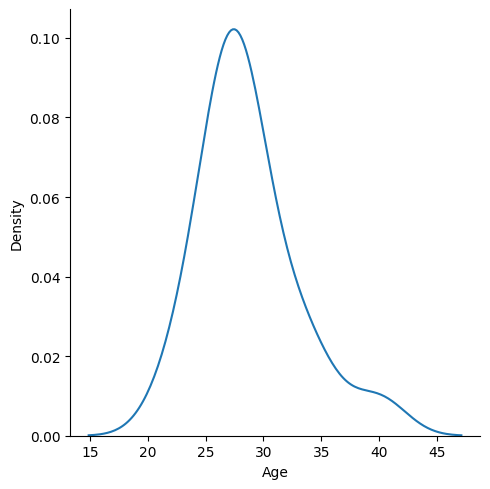

In [11]:
import seaborn as sns
sns.displot(df2['Age'],kind='kde')


In [53]:
df2['Age']=df2['Age'].fillna(df2['Age'].mean())
df2['Age'].isnull().sum()
df2['Age'].skew()

np.float64(1.2158869395711491)

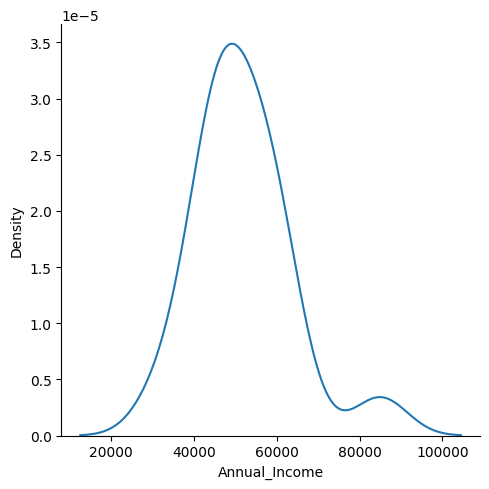

In [13]:
sns.displot(df2['Annual_Income'],kind='kde')

In [14]:
df2['Annual_Income']=df2['Annual_Income'].fillna(df2['Annual_Income'].median())
df2['Annual_Income'].isnull().sum()
df2['Annual_Income'].skew()

np.float64(1.3097874009442725)

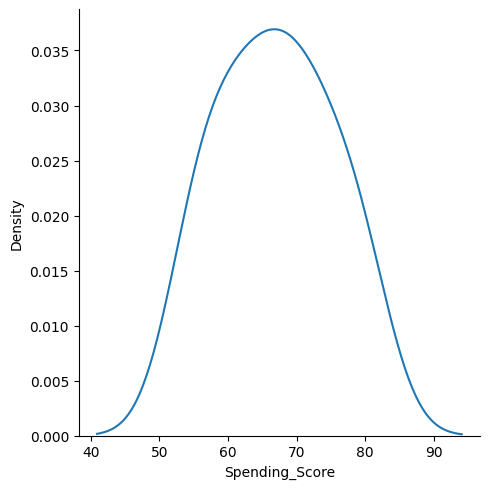

In [15]:
sns.displot(df2['Spending_Score'],kind='kde')

In [16]:
df2['Spending_Score']=df2['Spending_Score'].fillna(df2['Spending_Score'].mean())
df2['Spending_Score'].isnull().sum()
df2['Spending_Score'].skew()


np.float64(0.06980138179331119)

In [17]:
df2.isnull().sum()

Customer_ID       0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [18]:
df.update(df1)
df.update(df2)
df



,Customer_ID,Age,Annual_Income,Spending_Score,Gender,Satisfaction_Level
0,101,25.000000,40000.0,60.000000,Male,Medium
1,102,30.000000,50000.0,70.000000,Female,High
2,103,22.000000,32000.0,55.000000,Female,Low
3,104,35.000000,58000.0,80.000000,Male,High
4,105,28.000000,45000.0,65.000000,Female,Medium
5,106,40.000000,62000.0,66.944444,Female,High
6,107,29.000000,48000.0,75.000000,Female,Medium
7,108,28.666667,49000.0,72.000000,Female,Medium
8,109,27.000000,41000.0,60.000000,Female,Low
9,110,33.000000,54000.0,78.000000,Male,High


In [19]:
df[df.duplicated()]

,Customer_ID,Age,Annual_Income,Spending_Score,Gender,Satisfaction_Level


In [20]:
df = df.drop(['Customer_ID'], axis=1)
df.head()

,Age,Annual_Income,Spending_Score,Gender,Satisfaction_Level
0,25.0,40000.0,60.0,Male,Medium
1,30.0,50000.0,70.0,Female,High
2,22.0,32000.0,55.0,Female,Low
3,35.0,58000.0,80.0,Male,High
4,28.0,45000.0,65.0,Female,Medium


In [21]:
# ENCODING
# 	Satisfaction_Level => IT IS AT OUTPUT AND IT IS ORDINAL VARIABLES SO WE APLLY LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['Satisfaction_Level'] = Le.fit_transform(df['Satisfaction_Level'])
df.head()




,Age,Annual_Income,Spending_Score,Gender,Satisfaction_Level
0,25.0,40000.0,60.0,Male,2
1,30.0,50000.0,70.0,Female,0
2,22.0,32000.0,55.0,Female,1
3,35.0,58000.0,80.0,Male,0
4,28.0,45000.0,65.0,Female,2


In [22]:
# Gender is a nominal variable so we can apply one hot becase it has only two feature 
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first' ,sparse_output=False)
df_hot=ohe.fit_transform(df[['Gender']])
df_hot

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [23]:
df_new=pd.DataFrame(df_hot,columns=['Gender_Female'])
df_new

,Gender_Female
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,1.0


In [24]:
df_total = pd.concat([df, df_new],axis=1)
df_total

,Age,Annual_Income,Spending_Score,Gender,Satisfaction_Level,Gender_Female
0,25.000000,40000.0,60.000000,Male,2,1.0
1,30.000000,50000.0,70.000000,Female,0,0.0
2,22.000000,32000.0,55.000000,Female,1,0.0
3,35.000000,58000.0,80.000000,Male,0,1.0
4,28.000000,45000.0,65.000000,Female,2,0.0
5,40.000000,62000.0,66.944444,Female,0,0.0
6,29.000000,48000.0,75.000000,Female,2,0.0
7,28.666667,49000.0,72.000000,Female,2,0.0
8,27.000000,41000.0,60.000000,Female,1,0.0
9,33.000000,54000.0,78.000000,Male,0,1.0


In [25]:
df_total.drop(columns=['Gender'],inplace=True)

In [26]:
df_total

,Age,Annual_Income,Spending_Score,Satisfaction_Level,Gender_Female
0,25.000000,40000.0,60.000000,2,1.0
1,30.000000,50000.0,70.000000,0,0.0
2,22.000000,32000.0,55.000000,1,0.0
3,35.000000,58000.0,80.000000,0,1.0
4,28.000000,45000.0,65.000000,2,0.0
5,40.000000,62000.0,66.944444,0,0.0
6,29.000000,48000.0,75.000000,2,0.0
7,28.666667,49000.0,72.000000,2,0.0
8,27.000000,41000.0,60.000000,1,0.0
9,33.000000,54000.0,78.000000,0,1.0


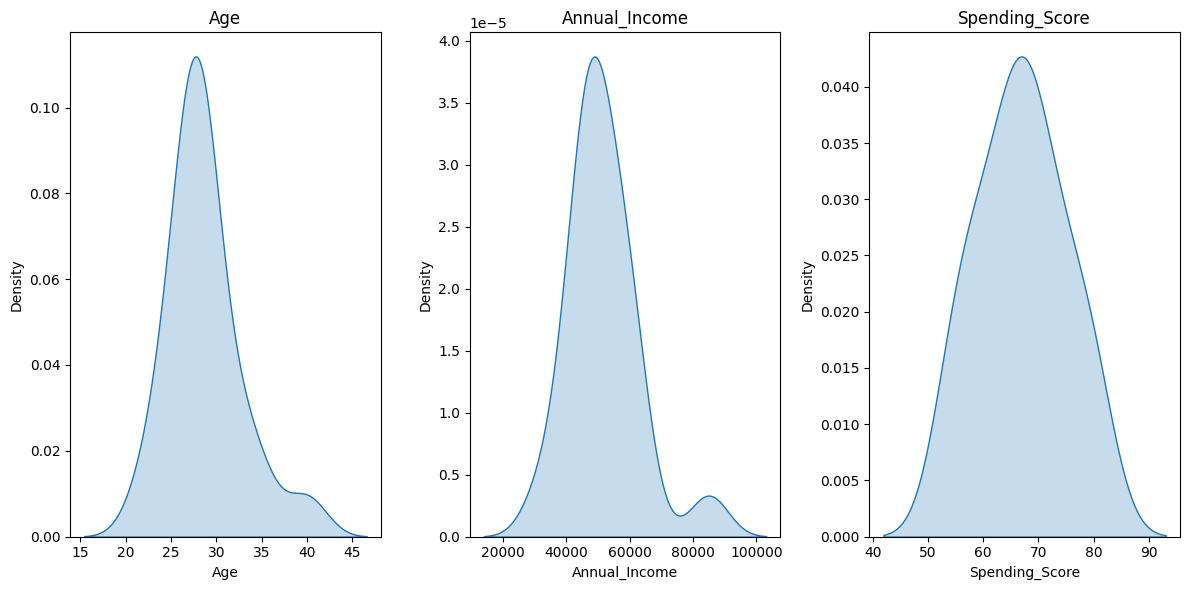

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
num_cols = ['Age','Annual_Income','Spending_Score']

# Create subplot grid
plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.kdeplot(df[col], fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [28]:
df['Age'].skew()

np.float64(1.2158869395711491)

In [29]:
df['Annual_Income'].skew()

np.float64(1.3097874009442725)

In [30]:
df['Spending_Score'].skew()

np.float64(0.06980138179331119)

<Axes: xlabel='Age'>

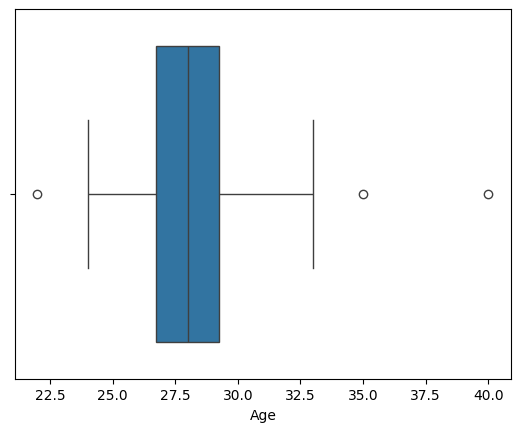

In [31]:
sns.boxplot(df_total['Age'],orient='h')

In [54]:
Q1=df_total['Age'].quantile(0.25)
Q3=df_total['Age'].quantile(0.75)
print(Q1,Q3)
IQR=Q3-Q1
print(IQR)

26.5 28.666666666666668
2.166666666666668


In [33]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(f"upper_limit:{upper_limit}")
print(f"lower_limit:{lower_limit}")


upper_limit:33.0
lower_limit:23.0


In [34]:
df_total[(df_total['Age']>upper_limit)|(df_total['Age']<lower_limit)]

,Age,Annual_Income,Spending_Score,Satisfaction_Level,Gender_Female
2,22.0,32000.0,55.000000,1,0.0
3,35.0,58000.0,80.000000,0,1.0
5,40.0,62000.0,66.944444,0,0.0


In [35]:
# Trimming
df_total=df_total[(df_total['Age']<upper_limit)&(df_total['Age']>lower_limit)]
df_total.head()

,Age,Annual_Income,Spending_Score,Satisfaction_Level,Gender_Female
0,25.000000,40000.0,60.0,2,1.0
1,30.000000,50000.0,70.0,0,0.0
4,28.000000,45000.0,65.0,2,0.0
6,29.000000,48000.0,75.0,2,0.0
7,28.666667,49000.0,72.0,2,0.0


In [36]:
# CAPPING
import numpy as np
df_total['Age']=np.where(
    df_total['Age']>upper_limit,
    upper_limit,
    np.where(
        df_total['Age']<lower_limit,
        lower_limit,
        df_total['Age']
        
    )
)


C:\Users\nk424\AppData\Local\Temp\ipykernel_39580\3130468704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['Age']=np.where(


In [37]:
df_total.head()

,Age,Annual_Income,Spending_Score,Satisfaction_Level,Gender_Female
0,25.000000,40000.0,60.0,2,1.0
1,30.000000,50000.0,70.0,0,0.0
4,28.000000,45000.0,65.0,2,0.0
6,29.000000,48000.0,75.0,2,0.0
7,28.666667,49000.0,72.0,2,0.0


<Axes: xlabel='Age'>

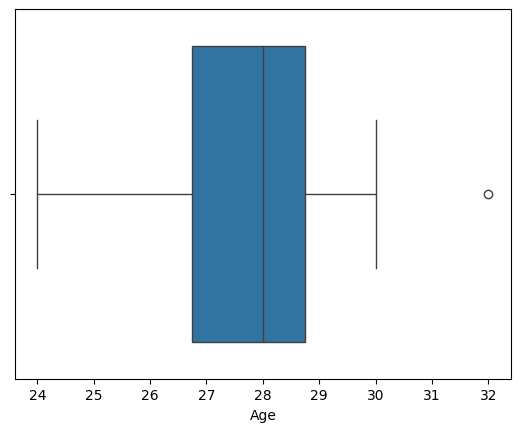

In [38]:
sns.boxplot(df_total['Age'],orient='h')

<Axes: xlabel='Annual_Income'>

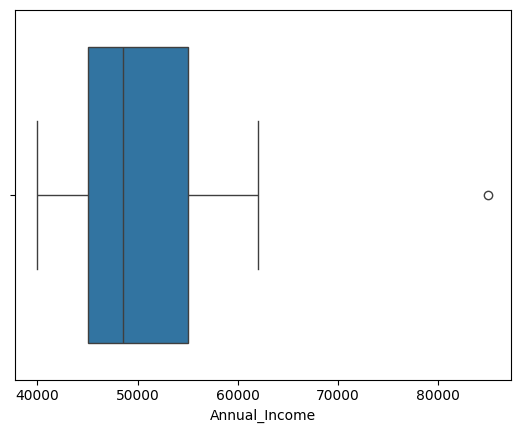

In [39]:
sns.boxplot(df_total['Annual_Income'],orient='h')

In [40]:
# we apply IQR because it in not normal distributed for Annual_income
Q1=df_total['Annual_Income'].quantile(0.25)
Q3=df_total['Annual_Income'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
print(Q1,Q3)

10000.0
45000.0 55000.0


In [41]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(f"upper_limit:{upper_limit}")
print(f"lower_limit:{lower_limit}")

upper_limit:70000.0
lower_limit:30000.0


In [42]:
df_outliers=df_total[(df_total['Annual_Income']<lower_limit)|(df_total['Annual_Income']>upper_limit)]
df_outliers

,Age,Annual_Income,Spending_Score,Satisfaction_Level,Gender_Female
15,32.0,85000.0,70.0,0,1.0


In [43]:
df_total = df_total[
    (df_total['Annual_Income'] >= lower_limit) &
    (df_total['Annual_Income'] <= upper_limit)
]
df_total.head()


,Age,Annual_Income,Spending_Score,Satisfaction_Level,Gender_Female
0,25.000000,40000.0,60.0,2,1.0
1,30.000000,50000.0,70.0,0,0.0
4,28.000000,45000.0,65.0,2,0.0
6,29.000000,48000.0,75.0,2,0.0
7,28.666667,49000.0,72.0,2,0.0


In [44]:
# we will apply z_score on Spending_Score because it is normally distributed
df_total['Spending_Score']=(df_total['Spending_Score']-df_total['Spending_Score'].mean())/df_total['Spending_Score'].std()
df_total['Spending_Score']

0    -0.819584
1     0.562600
4    -0.128492
6     1.253693
7     0.839037
8    -0.819584
10    0.147945
11    0.977256
12    0.140266
13   -0.128492
14   -0.819584
16   -1.510677
17    1.944785
18   -0.128492
19   -1.510677
Name: Spending_Score, dtype: float64

In [45]:
df_total['Spending_Score'].describe()

count    1.500000e+01
mean    -1.332268e-16
std      1.000000e+00
min     -1.510677e+00
25%     -8.195843e-01
50%     -1.284920e-01
75%      7.008188e-01
max      1.944785e+00
Name: Spending_Score, dtype: float64

In [46]:
df_outliers=df_total[(df['Spending_Score']<-3)|(df['Spending_Score'])>3]
df_outliers

C:\Users\nk424\AppData\Local\Temp\ipykernel_39580\204037842.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outliers=df_total[(df['Spending_Score']<-3)|(df['Spending_Score'])>3]


,Age,Annual_Income,Spending_Score,Satisfaction_Level,Gender_Female


<Axes: xlabel='Spending_Score'>

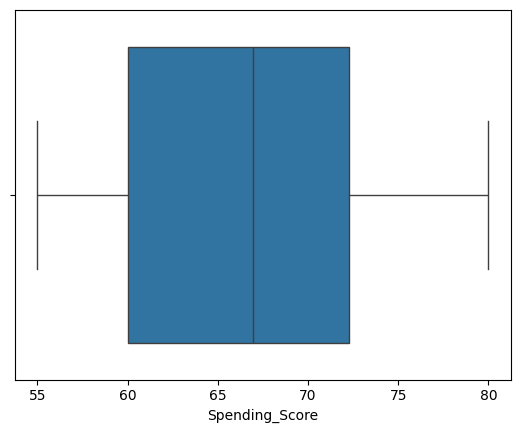

In [47]:
sns.boxplot(df['Spending_Score'],orient='h')

In [48]:
df_total

,Age,Annual_Income,Spending_Score,Satisfaction_Level,Gender_Female
0,25.000000,40000.0,-0.819584,2,1.0
1,30.000000,50000.0,0.562600,0,0.0
4,28.000000,45000.0,-0.128492,2,0.0
6,29.000000,48000.0,1.253693,2,0.0
7,28.666667,49000.0,0.839037,2,0.0
8,27.000000,41000.0,-0.819584,1,0.0
10,26.000000,49000.0,0.147945,2,0.0
11,28.666667,47000.0,0.977256,2,1.0
12,29.000000,48000.0,0.140266,2,0.0
13,28.000000,45000.0,-0.128492,2,0.0


In [49]:
# SCALARIZATION
# STAND_SCALLER
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df_scaled=std.fit_transform(df_total)

In [50]:
df_scaled

array([[-1.52421467, -1.51535207, -0.84835031,  0.47673129,  1.6583124 ],
       [ 1.62210001,  0.11991995,  0.58234665, -2.38365647, -0.60302269],
       [ 0.36357414, -0.69771606, -0.13300183,  0.47673129, -0.60302269],
       [ 0.99283708, -0.20713446,  1.29769514,  0.47673129, -0.60302269],
       [ 0.78308276, -0.04360725,  0.86848605,  0.47673129, -0.60302269],
       [-0.26568879, -1.35182487, -0.84835031, -0.95346259, -0.60302269],
       [-0.89495173, -0.04360725,  0.15313756,  0.47673129, -0.60302269],
       [ 0.78308276, -0.37066166,  1.01155574,  0.47673129,  1.6583124 ],
       [ 0.99283708, -0.20713446,  0.14518925,  0.47673129, -0.60302269],
       [ 0.36357414, -0.69771606, -0.13300183,  0.47673129, -0.60302269],
       [-0.26568879,  0.93755596, -0.84835031,  0.47673129,  1.6583124 ],
       [ 0.36357414,  0.93755596, -1.56369879,  0.47673129, -0.60302269],
       [-0.26568879,  2.08224637,  2.01304362, -2.38365647, -0.60302269],
       [-0.89495173,  1.75519197, -0.1

In [51]:
# Min_Max 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_total)
df_scaled


array([[0.16666667, 0.        , 0.2       , 1.        , 1.        ],
       [1.        , 0.45454545, 0.6       , 0.        , 0.        ],
       [0.66666667, 0.22727273, 0.4       , 1.        , 0.        ],
       [0.83333333, 0.36363636, 0.8       , 1.        , 0.        ],
       [0.77777778, 0.40909091, 0.68      , 1.        , 0.        ],
       [0.5       , 0.04545455, 0.2       , 0.5       , 0.        ],
       [0.33333333, 0.40909091, 0.48      , 1.        , 0.        ],
       [0.77777778, 0.31818182, 0.72      , 1.        , 1.        ],
       [0.83333333, 0.36363636, 0.47777778, 1.        , 0.        ],
       [0.66666667, 0.22727273, 0.4       , 1.        , 0.        ],
       [0.5       , 0.68181818, 0.2       , 1.        , 1.        ],
       [0.66666667, 0.68181818, 0.        , 1.        , 0.        ],
       [0.5       , 1.        , 1.        , 0.        , 0.        ],
       [0.33333333, 0.90909091, 0.4       , 1.        , 1.        ],
       [0.        , 0.22727273, 0.